# Neural Networks
### Author: _Calvin Chi_

# Introduction
Neural network is a powerful supervised machine learning algorithm suited for both regression and classification problems. A unique feature about this algorithm is that it allows for the implicit learning of features without having the user explicitly design them. The neural network is a constructed by several neurons with the following architecture: 

<img src="http://i.imgur.com/yZfR8RH.png", width=300, height=300/>

In this representation, $x_{1},...,x_{3}$ are the input values for features $1$ to $3$, and $+1$ is the bias term to increase the model space. The neuron then accepts these input to output $h_{W, b}(x) = f(W^{T}x) = f(\sum_{i=1}^{3}W_{i}x_{i} + W_{4}b)$, where $W \in \mathbb{R}^{4 x 1}$ is a vector of weights for each of the input values and $b$ represents the bias of $+1$. $f()$ is an activation function, typically chosen to be the sigmoid function or tanh function. The activation function serves the purpose that small changes in the weights and biases only results in small changes in the final output.

A neural network is built from these individual neurons. An example of a neural network with $3$ layers looks like this:

<img src="http://i.imgur.com/W8jxjyy.png", width=400, height=150/>

With this architecture, our weight vector becomes a matrix instead. To go from layer $L_{1}$ to layer $L_{2}$, we would need a $W^{(1)} \in \mathbb{R}^{4 x 3}$ matrix, where $4$ is the number of input values $n_{in}$ and $3$ is the number of output values $n_{out}$. The neurons in the second layer are denoted as $a^{(2)}_{j}$, where $j$ denotes the $j\text{th}$ neuron. According to above diagram, $a^{(2)}_{j}$ is calculated as $f((\sum_{i=1}^{3} W^{(1)}_{ij}x_{i}) + W^{(1)}_{4j} b^{(1)}_{j})$. To go from layer $2$ to layer $3$, one would use a $W^{(2)} \in \mathbb{R}^{4 x 1}$ vector, and the value of $h_{W, b}(x)$ is computed as $f((\sum_{i=1}^{3} W^{(2)}_{i1}a^{(2)}_{i}) + W^{(2)}_{41} b^{(2)}_{1})$. The logic of these computational steps can be extrapolated to neural networks in general with a number of layers and a given number of neurons per layer. Note that a neural network with more than $3$ layers is often called a deep neural network. 

# Backpropagation
Training a neural network involves iterately finding the values of the weight matrices via gradient descent to minimize error, which could be set as the mean square error or cross entropy error. Either way, the cost function is non-convex such that the result from training may represent a local solution instead of a global solution. One way to combat this is to randomly intialize the weight values prior to training. 

In this tutorial's implementation, we are going to implement neural network with stochastic gradient descent. In stochastic gradient descent, each sample will first be used to compute all $a$ using the current weight values in a procedure called feedforward propagation. Then in backpropagation, these computed $a$ are used to compute the gradients for each individual weight value, and used to update the weight value. 

Let us illustrate the procedure for deriving the gradients for each layer in matrix notation. Assume that we have $3$ layers with $2$ weight matrices. The middle layer will use the tanh activation function whereas the third layer will use the sigmoid function. We shall also derive the gradients separately for mean-square error and cross entropy error respectively.

In our notation, we denote $n_{out}$ to refer to the last layer and $\alpha$ as our learning rate. The sigmoid function is defined as:

$$g(z) = \frac{1}{1+e^{-z}}$$

Where as the tanh activation function is defined as:

$$f(z) = tanh(z)$$

In our derivation, we will make use of two mathematical properties:

1. $\frac{dg(z)}{dz} = \frac{e^{-z}}{(1 + e^{-z})^{2}} = \frac{1 + e^{-z}}{(1 + e^{-z})^{2}} - \frac{1}{(1 + e^{-z})^{2}} = \frac{1}{1 + e^{-z}} - \frac{1}{(1 + e^{-z})^{2}} = g(z)(1-g(z))\\$

2. $\frac{df(z)}{dz} = 1 - tanh^{2}(z)$

## Mean Square Error
According to our neural network design, mean square error is defined as: 

$$J = \frac{1}{2}\sum_{j=1}^{n_{out}} (y_{j} - g_{j}(a^{(3)}))^{2}$$

Where $y_{j}$ in our case represents the $j$th class we are trying to predict. Then our gradient for $W^{(2)}$ would be:

$$\frac{\partial J}{\partial W^{(2)}} = \frac{\partial J}{\partial g(a^{(3)})} \: \frac{\partial g(a^{(3)})}{\partial a^{(3)}} \: \frac{\partial a^{(3)}}{\partial W^{(2)}} = -a^{(2)}(y - g(a^{(3)}))^{T} diag[g(a^{(3)})(1 - g(a^{(3)}))]$$

The gradient for $W^{(1)}$ would be:

$$\frac{\partial J}{\partial W^{(1)}} = \frac{\partial J}{\partial g(a^{(3)})} \: \frac{\partial g(a^{(3)})}{\partial a^{(3)}} \: \frac{\partial a^{(3)}}{\partial f(a^{(2)})} \: \frac{\partial f(a^{(2)})}{\partial a^{(2)}} \: \frac{\partial a^{(2)}}{\partial W^{(1)}} = -x[ diag(1-tanh^{2}(a^{(2)}))(W^{(2)})^{T}diag[g(a^{(3)})(1 - g(a^{(3)}))](y - g(a^{(3)})) ]^{T}$$ 

Taking care of dimensions in matrix multiplication. The update equations then would be:

$$W^{(2)} = W^{(2)} - \alpha \frac{\partial J}{\partial W^{(2)}}\\$$

$$W^{(1)} = W^{(1)} - \alpha \frac{\partial J}{\partial W^{(1)}}$$

## Cross Entropy Error
According to our neural network design, cross entropy error is defined as: 

$$J = -\sum_{j=1}^{n_{out}} [y_{j} ln(g_{j}(a^{(3)}) + (1-y_{j})ln(1-g_{j}(a^{(3)}))]$$

The gradient for $W^{(2)}$ would be:

$$ \frac{\partial J}{\partial W^{(2)}} = \frac{\partial J}{\partial g(a^{(3)})} \: \frac{\partial g(a^{(3)})}{\partial a^{(3)}} \: \frac{\partial a^{(3)}}{\partial W^{(2)}} = a^{(2)}(\frac{1-y}{1-g(a^{(3)})} - \frac{y}{g(a^{(3)})})^{T} diag[g(a^{(3)})(1 - g(a^{(3)})]$$

And the gradient for $W^{(1)}$ would be:

$$ \frac{\partial J}{\partial W^{(1)}} = \frac{\partial J}{\partial g(a^{(3)})} \: \frac{\partial g(a^{(3)})}{\partial a^{(3)}} \: \frac{\partial a^{(3)}}{\partial f(a^{(2)})} \: \frac{\partial f(a^{(2)})}{\partial a^{(2)}} \: \frac{\partial a^{(2)}}{\partial W^{(1)}} = x [ diag(1 - tanh^{2}(a^{(2)})) (W^{(2)})^{T} diag[g(a^{(3)})(1 - g(a^{(3)}))] (\frac{1-y}{1 + e^{-a^{(3)}}} - y \frac{e^{-a^{(3)}}}{1 + e^{-a^{(3)}}}) ]^{T}$$

## Implementation
Our implementation shall have the following features:

+ Learning rate of $\alpha = \frac{1}{100 + 10k}$, where $k$ = number of epochs.
+ Weight initialization: each weight value is drawn randomly from a $N(0, \sigma=0.01)$ distribution. 
+ The neural network could optionally accept pre-trained weights as the starting point for training. 

The dataset we will be applying our implementation on will be the MNIST digits dataset. Thus, there will be 10 classes for each digit from $0$ to $9$. To train our classifier in recognizing these digits, we will have an input layer of $784$ neurons, a hidden layer of $200$ neurons, and an output layer of $10$ neurons. The number of neurons for the hidden layer can be user-defined, but the number of neurons for the input and output layers are determined by the problem we are working on. In the MNIST dataset, each sample is a $24 x 24$ pixel image, so that translates to $784$ feature values. There are a total of $10$ classes, leading to an output layer with $10$ neurons. The neural network is trained to output a probability for each class, and in our implementation we shall pick the class with the highest probability as our prediction. The usage of our `NeuralNetwork` class will be as follows:

```
classifier = NeuralNetwork(layers, loss="mean_square", monitor=False, plot=False, weights=[], iterations=[], errors=[], accuracies=[])
```

+ layers: a list of integers, each representing number of neurons for the layer it corresponds to by index. The integer at index $0$ indicates number of neurons for the input layer and the integer at index $len(layers)-1$ indicates the number of neurons for the output layer. 
+ loss: string of either "mean_square" for mean square loss or "cross_entropy" for cross entropy loss.
+ monitor: boolean indicating whether to print to screen the iteration number, current loss based on entire training dataset, accuracy in predicting on the training set, and accuracy in predicting on the validation set if appropriate.
+ plot: boolean indicating whether to plot a error vs iterations and accuracy vs iterations on the training set at the conclusion of the training process. 
+ weights, iterations, errors, accuracies: list of weights, list containing iteration counts, list of errors, and list of accuracies from prior training.

The usage for training the neural network is as follows:

```
classifier.train(x, Y, epochs, validation=None, validation_label=None)
```

+ x: training data in a numpy array 
+ Y: training labels in a numpy array
+ epochs: number of complete passes through the training data
+ validation: validation data in a numpy array
+ validation_label: validation label in a numpy array

Now we implement our `NeuralNetwork` class:

In [1]:
import numpy as np
import sys
import pickle
import matplotlib.pyplot as plt
import collections 
 
class NeuralNetwork: 
    
    def __init__(self, layers, loss="mean_square", monitor=False, 
        plot=False, weights=[], iterations=[], errors=[], accuracies=[]): 

        def tanh(x): 
            return np.tanh(x)

        def tanh_deriv(x): 
            return 1.0 - (x)**2

        def logistic(x):
            return 1 / (1 + np.exp(-x))
            
        def logistic_deriv(x): 
            return x * (1 - x)
            
        def mean_square(x, y): 
            total = 0
            for predict, label in zip(x, y):
                total += 0.5*np.sum((label - predict)**2)
            return total
            
        def mean_square_deriv(x, y):
            return -(y - x)
            
        def cross_entropy(x, y):
            total = 0
            for predict, label in zip(x, y):
                total += -(np.sum(label*np.log(predict) + (1-label)*np.log(1-predict)))
            return total

        def cross_entropy_deriv(x, y):
            return ((1-y)/(1-x)-(y/x))

        self.output_activation = logistic
        self.output_activation_deriv = logistic_deriv
        self.hidden_activation = tanh
        self.hidden_activation_deriv = tanh_deriv
        self.layers = layers
        self.weights = weights
        self.iterations = iterations
        self.errors = errors
        self.accuracies = accuracies
        self.monitor = monitor
        self.plot = plot
        self.lossName = loss
        if len(self.weights) == 0:
            for i in range(1, len(layers)-1):
                self.weights.append(np.random.normal(0, 0.01, (layers[i-1]+1, layers[i]+1)))
            self.weights.append(np.random.normal(0, 0.01, (layers[i]+1, layers[i+1])))
        if loss == "mean_square": 
            self.loss = mean_square
            self.loss_deriv = mean_square_deriv
        elif loss == "cross_entropy": 
            self.loss = cross_entropy
            self.loss_deriv = cross_entropy_deriv

    def train(self, x, Y, epochs, validation=None, validation_label=None):
        def accuracy(x, y):
            correct = 0
            for a, b in zip(x, y):
                if np.argmax(a) == np.argmax(b): 
                    correct += 1
            return correct/len(x)
        if len(self.iterations) != 0 and len(self.errors) != 0 and len(self.accuracies) != 0: 
            count = self.iterations[-1] + 1
        else:
            count = 0
        bias = np.ones((x.shape[0], 1))
        x = np.hstack((x, bias))
        for k in range(epochs):
            for i in range(len(x)):
                a = [x[[i], :]]
                y = Y[i]
                gradients = collections.deque()
                # Feedforward propagation step
                for j in range(len(self.weights)):
                    if j == len(self.weights) - 1: 
                        a.append(self.output_activation((np.dot(a[j], self.weights[j]))))
                    else: 
                        a.append(self.hidden_activation((np.dot(a[j], self.weights[j]))))
                # Backpropagation step
                deltas = collections.deque()
                deltas.append(np.dot((self.loss_deriv(a[-1], y)), 
                    np.diag(self.output_activation_deriv(a[-1])[0])))
                for j in range(len(self.weights) - 1, 0, -1):
                    delta = np.dot(np.dot(np.diag(self.hidden_activation_deriv(a[j])[0]), 
                        self.weights[j]), deltas[-1].T).T
                    deltas.appendleft(delta)
                # Final gradient calculation and weight update
                for j in range(len(deltas)-1, -1, -1):
                    gradient = np.dot(a[j].T, deltas[j])
                    gradients.appendleft(gradient)
                for j in range(len(self.weights)): 
                    self.weights[j] -= 1/float(100+10*k) * gradients[j]
                if self.monitor and count % 20000 == 0 or count in [1000, 5000, 10000, 15000]: 
                    self.iterations.append(count)
                    predictions1 = self.predict(x)
                    correct1 = accuracy(predictions1, Y)
                    self.accuracies.append(correct1)
                    error = self.loss(predictions1, Y)
                    self.errors.append(error)
                    if validation is not None and validation_label is not None:
                        predictions2 = self.predict(validation)
                        correct2 = accuracy(predictions2, validation_label)
                        print("# " + str(count), "error: ", error, "|", "training: ", 
                            correct1, "|", "validation: ", correct2)
                    else:
                        print("# " + str(count), "error: ", error, "|", "training: ",
                             correct1)
                if count % 54000 == 0: 
                    pickle.dump(self.weights, open("result/weights.p", 'wb'))
                    pickle.dump(self.iterations, open("result/iterations.p", 'wb'))
                    pickle.dump(self.accuracies, open("result/accuracies.p", 'wb'))
                    pickle.dump(self.errors, open("result/errors.p", 'wb'))
                count += 1
        pickle.dump(self.weights, open("result/weights.p", 'wb'))
        pickle.dump(self.iterations, open("result/iterations.p", 'wb'))
        pickle.dump(self.accuracies, open("result/accuracies.p", 'wb'))
        pickle.dump(self.errors, open("result/errors.p", 'wb'))
        if self.plot:
            plt.plot(self.iterations, self.errors)
            plt.xlabel("Iterations")
            plt.ylabel("Error")
            plt.title("Training Error vs Iterations (" + self.lossName + ")")
            plt.show()
            plt.plot(self.iterations, self.accuracies)
            plt.xlabel("Iterations")
            plt.ylabel("Accuracy")
            plt.title("Training Accuracy vs Iterations (" + self.lossName + ")")
            plt.show()

    def predict(self, x):
        predictions = []
        if x.shape[1] != self.layers[0]+1: 
            bias = np.ones((x.shape[0], 1))
            x = np.hstack((x, bias))
        for i in range(len(x)): 
            for l in range(0, len(self.weights)):
                if l == len(self.weights)-1: 
                    a = self.output_activation(np.dot(a, self.weights[l]))
                else: 
                    a = self.hidden_activation(np.dot(x[[i], :], self.weights[l]))
            predictions.append(a)
        return np.array(predictions)

In this tutorial, we are going to train a neural network with mean square error and cross entropy as the loss function respectively, and compare the effectiveness of each loss function at the end. Now let us load our MNIST dataset, visualize it,and pre-process it:

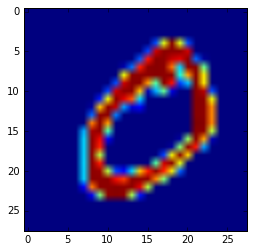

In [15]:
%matplotlib inline
import numpy as np
from scipy import io
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import time

datasetDir = "datasets/MNIST/"
datamat = io.loadmat(datasetDir + 'train.mat')
test_images = io.loadmat(datasetDir + 'test.mat')['test_images']
train_images = datamat['train_images']
labels = datamat['train_labels']
train_images = np.transpose(train_images, (2, 0, 1))
plt.imshow(train_images[0])
plt.show()

In [16]:
train_images = np.reshape(train_images, (train_images.shape[0], 784))
indices = np.random.permutation(labels.shape[0])
train_images = train_images[indices].astype(float)

In data pre-processing it is common to scale the dataset so that each feature(column) are standardized.

In [17]:
train_images = scale(train_images, axis = 0, copy=False)

Conver the label vector to a matrix. The label for each sample is now represented by a $10$-dimensional vector with a $1$ at the index position corresponding to its class and $0$ elsewhere. 

In [18]:
labels = labels[indices]
train_labels = [np.zeros((1, 10)) for i in range(labels.shape[0])]
for array, label in zip(train_labels, labels): 
    array[0][label] = 1
train_labels = np.array(train_labels)
test_images = np.transpose(test_images, (2, 0, 1))
test_images = np.reshape(test_images, (test_images.shape[0], 784))

And now we are ready to train our neural network! Let us first split our training dataset so that $9/10$th of it is used for training and $1/10$th of it is used for validation error. Let us train a model using mean square error as our loss function.

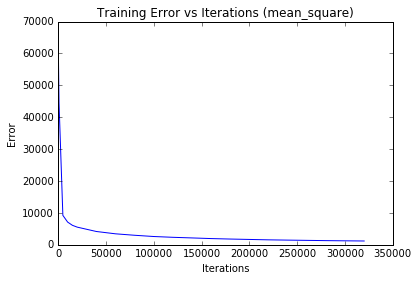

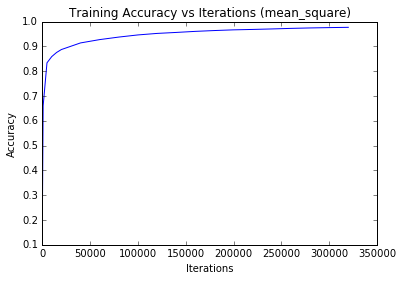

With 6 epochs, the training time is:  385.72842597961426
The validation accuracy is:  0.9631666666666666


In [23]:
def accuracy(x, y):
    correct = 0
    for a, b in zip(x, y):
        if np.argmax(a) == np.argmax(b): 
            correct += 1
    return correct/len(x)

train = train_images[:(9*len(train_images)//10)]
train_label = train_labels[:(9*len(train_images)//10)]
validation = train_images[(9*len(train_images)//10):len(train_images)]
validation_label = train_labels[(9*len(train_images)//10):len(train_images)]
NN = NeuralNetwork([784, 200, 10], loss="mean_square", 
                  plot=True)
start = time.time()
epochs = 6
NN.train(train, train_label, epochs, validation=validation, 
         validation_label=validation_label)
end = time.time()
print("With " + str(epochs) + " epochs, the training time is: ", end-start)
predictions = NN.predict(validation)
p_correct = accuracy(predictions, validation_label)
print("The validation accuracy is: ", p_correct) 

Now let us train the model using cross entropy error as our loss function, with the same number of epochs. 

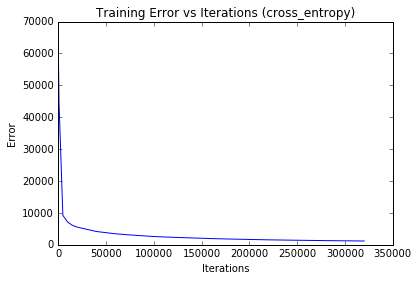

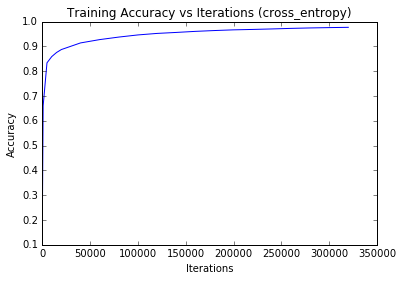

With 6 epochs, the training time is:  425.2575750350952
The validation accuracy is:  0.9636666666666667


In [24]:
NN = NeuralNetwork([784, 200, 10], loss="cross_entropy", 
                  plot=True)
start = time.time()
epochs = 6
NN.train(train, train_label, epochs, validation=validation, 
         validation_label=validation_label)
end = time.time()
print("With " + str(epochs) + " epochs, the training time is: ", end-start)
predictions = NN.predict(validation)
p_correct = accuracy(predictions, validation_label)
print("The validation accuracy is: ", p_correct) 

# Optimizations
Given choices of different loss functions, activation functions, and maybe tweaks to other parts of the neural network, how can we improve performanc and speed? This section addresses that topic matter.  
## Loss function
Is mean squared error or cross entropy error better for a neural network? Let us setup the basis for this discussion by describing a simple neuron with one input and one weight.  

$$a = g(wx + b) = g(z)$$

Where $g(x)$ is the sigmoid function. Recall the math property that $g'(x) = g(x)(1 - g(x))$. Assume in this discussion that we only have one sample. If mean squared error is our cost(or loss) function, then it is:

$$C = \frac{1}{2}(y - a)^{2}$$

Where $y$ is the true value. It is important to now recognize that weight updates are determined by $\partial C / \partial w$. If there is a great discrepancy between output and true label, then we want the weight updates to be more drastic, or in other words, we want $\partial C / \partial w$ to be large. Let us determine $\partial C / \partial w$:

$$\frac{\partial C}{\partial w} = -(y - a)g(z)(1 - g(z))x$$

With this expression, we can tell that whenever $g(z)$ is close to 1 or 0, then learning rate drastically slows down. This may be undesirable because learning will be slow even if $y = 1$ and $g(z) \approx 0$.

Now we turn to cross entropy. Again with one weight, one input, and one sample, the cost function is:

$$C = -yln(a) - (1-y)ln(1-a)$$

Taking the derivative:

$$\frac{\partial C}{\partial w} = -\left(\frac{y}{g(z)} - \frac{1 - y}{1 - g(z)}\right)g'(z)x$$

$$= -\left(\frac{y - yg(z) - g(z) + g(z)y}{g(z)(1-g(z))}\right)g'(z)x$$

$$= -\left(\frac{y - g(z)}{g(z)(1-g(z))}\right)g(z)(1-g(z))x$$

$$= (g(z) - y)x$$

We see that the learning rate is proportional to the difference between the true label and output. Furthermore, the learning rate is no longer small if $g(z) \approx 0$ or $g(z) \approx 1$, a problem encountered when using mean squared error. Thus, we can conclude that choosing cross entropy as our loss function improves the speed of training.

## Output Activation Function

In our MNIST digit classification problem, we have 10 distinct classes we are trying to predict. If we choose our output activation function to be the sigmoid function, then each of the output neurons outputs the probability of being a class vs the probability of belonging to the rest of the classes. 

However, it is more natural in a multiclass classification setting to output a probability distribution over all the classes. For example, an increase in probability of class $i$ necessarily means a decrease in the cumulative probability of the other classes. 

To enforce this, instead of having sigmoid as the output activation function, use the softmax activation function:

$$a_{i} = \frac{e^{z_{i}}}{\sum_{j = 1}^{k}e^{z_{j}}}$$

Where $k$ is the number of classes and $i$ refers to class $i$. The rest of the notation is a continuation of notation from the previous section. It can be easily verified that:

$$\sum_{i=1}^{k}a_{i} = 1$$

And that:

$$1 > a_{i} > 0$$

Which means $a$ can be interpreted as a probability distribution of $k$ distinct classes. In probabilistic terms, the joint distribution of the classes is a multinomial distribution with $n = 1$, since we are calculating the probability of a sample being one of $k$ distinct classes. Writing down the joint distribution:

$$p(y) = \dbinom{1}{1}p_{1}^{1\{y=1\}}...p_{k}^{1\{y=k\}} = p_{1}^{1\{y=1\}}...p_{k}^{1\{y=k\}}$$

Using knowledge of generalized linear models, one can derive the softmax activation function above as the response function by identifying the link function. 

## Inner Activation Function
Both the $\tanh(x)$ and sigmoid activation functions lead to the vanishing gradient problem. In the vanishing gradient problem, if the output is close to 1 or 0, their derivatives approaches 0. This is discussed above and can also be visually seen from the shapes of the activation functions when plotted. This reduces the gradient size because the weight update rules involve taking the derivative with respect to the activation functions.

A workaround to this is to use the rectifier activation function, defined as:

$$f(x) = \max(0, x)$$

A neuron employing the rectifier is called the rectified linear unit (ReLU). The derivative of the rectifier activation function is:

$$f'(x)=\begin{cases}
    1, & \text{if $x > 0$}\\
    0, & \text{otherwise}\\
  \end{cases}$$

Which does not suffer from the vanishing gradient problem. Another advantage of ReLu is inducing sparsity in the neural network. Sparsity means that the a significant proportion of outputs from each neuron is 0. The reason this is so is because any negative values fed to the rectifier activation function gets outputted as 0.